In [29]:
import pandas as pd
import joblib
import json
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt

def load_config(config_file="../config.json"):
    """Load configuration from a JSON file."""
    with open(config_file, 'r') as file:
        config = json.load(file)
    return config

In [30]:
test_df = pd.read_csv('../outputs/test_df.csv')

In [31]:
test_df

,projectid,total_price_excluding_optional_support,students_reached,total_projects_in_city,total_projects_in_state,percentage_reached_month_1,percentage_reached_month_2,percentage_reached_month_3,date_posted,fully_funded,...,month_posted_December,month_posted_February,month_posted_January,month_posted_July,month_posted_June,month_posted_March,month_posted_May,month_posted_November,month_posted_October,month_posted_September
0,a11d5c86692ef20e9f702094504bb5db,-0.011812,-0.026369,-0.604428,1.760114,-0.776143,-0.969951,-1.103760,2013-01-01,1.0,...,False,False,True,False,False,False,False,False,False,False
1,8bdc6b4cfc850f6f7cc3963c48ba454b,0.036787,0.008909,-0.619092,-1.032311,-0.594878,-0.798105,-0.932964,2013-01-01,0.0,...,False,False,True,False,False,False,False,False,False,False
2,88f263f1cd657bccce254ffc0b79df4d,0.023713,-0.028831,-0.627791,1.760114,1.452347,1.142747,0.996033,2013-01-01,1.0,...,False,False,True,False,False,False,False,False,False,False
3,a8a6e08b6ae7ab1a88c16ba82ac8e9da,-0.002366,-0.000936,-0.614867,-0.745992,1.452347,1.142747,0.996033,2013-01-01,1.0,...,False,False,True,False,False,False,False,False,False,False
4,be21151602e4fd47dd4012114fd519c6,-0.022787,-0.030061,-0.598588,-0.661352,-0.379132,1.142747,0.996033,2013-01-01,1.0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114032,a0e839f24645e3d6dcbd327f8441b043,0.001489,-0.015704,1.890146,0.566334,0.411419,1.142747,0.996033,2013-12-31,1.0,...,True,False,False,False,False,False,False,False,False,False
114033,f820ef3537f4445b0716244fae36f763,-0.019920,-0.028010,-0.633631,-1.034493,-0.776143,-0.969951,-1.103760,2013-12-31,0.0,...,True,False,False,False,False,False,False,False,False,False
114034,95ee208a51831edffa7cc2e0aa3e83cd,-0.025463,-0.000116,-0.274494,-0.858846,1.452347,1.142747,0.996033,2013-12-31,1.0,...,True,False,False,False,False,False,False,False,False,False
114035,1aa5e1d739a40c2763da1a0bb0f0f335,-0.027321,-0.030882,-0.534216,-0.690961,1.452347,1.142747,0.996033,2013-12-31,1.0,...,True,False,False,False,False,False,False,False,False,False


In [32]:
test_df.columns

Index(['projectid', 'total_price_excluding_optional_support',
       'students_reached', 'total_projects_in_city', 'total_projects_in_state',
       'percentage_reached_month_1', 'percentage_reached_month_2',
       'percentage_reached_month_3', 'date_posted', 'fully_funded',
       'poverty_level_high poverty', 'poverty_level_low poverty',
       'school_metro_rural', 'school_metro_suburban', 'school_metro_urban',
       'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service', 'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subje

In [33]:
test_df['date_posted'] = pd.to_datetime(test_df['date_posted'])

In [34]:
# Set max_date to filter projects posted for at least 3 months
fixed_max_date = pd.to_datetime('2013-12-31')
test_df['months_since_posted'] = ((fixed_max_date - test_df['date_posted']) / pd.Timedelta(days=30)).astype(int)
eligible_projects = test_df[test_df['months_since_posted'] >= 3].copy()

In [35]:
test_df.columns

Index(['projectid', 'total_price_excluding_optional_support',
       'students_reached', 'total_projects_in_city', 'total_projects_in_state',
       'percentage_reached_month_1', 'percentage_reached_month_2',
       'percentage_reached_month_3', 'date_posted', 'fully_funded',
       'poverty_level_high poverty', 'poverty_level_low poverty',
       'school_metro_rural', 'school_metro_suburban', 'school_metro_urban',
       'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service', 'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subje

In [36]:
config = load_config()
poverty_levels = ["low", "high"]
models = ["random_forest", "logistic_regression"]
recommendations = {}
all_recommendations = pd.DataFrame()

In [37]:
all_recommendations = eligible_projects.copy()

for model_type in models:
    for pov_level in poverty_levels:
        pov_column = f"poverty_level_{pov_level} poverty"   
        pov_projects = eligible_projects[eligible_projects[pov_column] == 1].copy()      
        classifier = joblib.load(f"../outputs/{model_type}_{pov_level}_poverty.pkl")
        
        X_test_filtered = pov_projects.drop(columns=['fully_funded', 'date_posted', 'months_since_posted', 'projectid'], errors='ignore')
        X_test_filtered = X_test_filtered.reindex(columns=classifier.feature_names_in_, fill_value=0)
        
        proba_column = f'proba_{model_type}' 
        pov_projects[proba_column] = classifier.predict_proba(X_test_filtered)[:, 1]

        all_recommendations.loc[pov_projects.index, proba_column] = pov_projects[proba_column]

In [38]:
all_recommendations

,projectid,total_price_excluding_optional_support,students_reached,total_projects_in_city,total_projects_in_state,percentage_reached_month_1,percentage_reached_month_2,percentage_reached_month_3,date_posted,fully_funded,...,month_posted_July,month_posted_June,month_posted_March,month_posted_May,month_posted_November,month_posted_October,month_posted_September,months_since_posted,proba_random_forest,proba_logistic_regression
0,a11d5c86692ef20e9f702094504bb5db,-0.011812,-0.026369,-0.604428,1.760114,-0.776143,-0.969951,-1.103760,2013-01-01,1.0,...,False,False,False,False,False,False,False,12,0.11,0.165438
1,8bdc6b4cfc850f6f7cc3963c48ba454b,0.036787,0.008909,-0.619092,-1.032311,-0.594878,-0.798105,-0.932964,2013-01-01,0.0,...,False,False,False,False,False,False,False,12,0.28,0.164484
2,88f263f1cd657bccce254ffc0b79df4d,0.023713,-0.028831,-0.627791,1.760114,1.452347,1.142747,0.996033,2013-01-01,1.0,...,False,False,False,False,False,False,False,12,1.00,0.991409
3,a8a6e08b6ae7ab1a88c16ba82ac8e9da,-0.002366,-0.000936,-0.614867,-0.745992,1.452347,1.142747,0.996033,2013-01-01,1.0,...,False,False,False,False,False,False,False,12,1.00,0.983757
4,be21151602e4fd47dd4012114fd519c6,-0.022787,-0.030061,-0.598588,-0.661352,-0.379132,1.142747,0.996033,2013-01-01,1.0,...,False,False,False,False,False,False,False,12,0.98,0.991611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76298,92008258a5af63dcaedf45a6ba930856,0.024790,-0.025959,-0.636117,1.760114,1.452347,1.142747,0.996033,2013-10-02,1.0,...,False,False,False,False,False,True,False,3,1.00,0.989309
76299,12f6f130b4595c2387cf0a588f6e084d,-0.003116,-0.030061,-0.627791,-0.101967,1.452347,1.142747,0.996033,2013-10-02,1.0,...,False,False,False,False,False,True,False,3,1.00,0.991605
76300,f1a12041e191265ada62787b032f84ed,-0.016438,-0.028831,1.627069,0.566334,-0.776143,-0.969951,0.996033,2013-10-02,1.0,...,False,False,False,False,False,True,False,3,0.99,0.998942
76301,792345c61483e1d4ff14fc72dccf586d,0.043813,-0.028010,-0.564289,-0.978494,-0.759529,-0.954200,-1.088106,2013-10-02,0.0,...,False,False,False,False,False,True,False,3,0.06,0.091984


In [39]:
top_recommendations = {}

poverty_levels = ["low", "high"]

for pov_level in poverty_levels:
    pov_column = f"poverty_level_{pov_level} poverty"
    
    # Filter the DataFrame for the current poverty level
    pov_projects = all_recommendations[all_recommendations[pov_column] == 1]
    
    # Set the number of projects to select based on the poverty level
    top_n = 10 if pov_level in ["high"] else 3
    
    top_rf = pov_projects.nlargest(top_n, 'proba_random_forest').copy()
    top_recommendations[(pov_level, 'random_forest')] = top_rf 
    top_logistic = pov_projects.nlargest(top_n, 'proba_logistic_regression').copy()
    top_recommendations[(pov_level, 'logistic_regression')] = top_logistic

In [40]:
top_recommendations[('high', 'random_forest')].columns

Index(['projectid', 'total_price_excluding_optional_support',
       'students_reached', 'total_projects_in_city', 'total_projects_in_state',
       'percentage_reached_month_1', 'percentage_reached_month_2',
       'percentage_reached_month_3', 'date_posted', 'fully_funded',
       'poverty_level_high poverty', 'poverty_level_low poverty',
       'school_metro_rural', 'school_metro_suburban', 'school_metro_urban',
       'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service', 'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subje

In [41]:
top_recommendations[('high', 'random_forest')]['school_metro_urban']

2     False
3     False
6      True
9      True
10    False
14     True
22     True
25     True
26     True
28     True
Name: school_metro_urban, dtype: bool

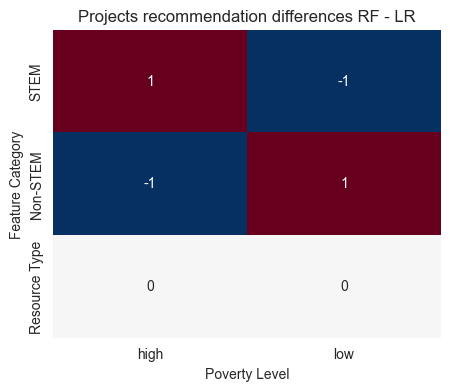

In [43]:
feature_categories = {
    'STEM': [
        'primary_focus_subject_Applied Sciences', 
        'primary_focus_subject_Environmental Science', 
        'primary_focus_subject_Health & Life Science',
        'primary_focus_subject_Mathematics',
        'primary_focus_subject_Nutrition',
        'primary_focus_subject_Health & Wellness'
    ],
    'Non-STEM': [
        col for col in all_recommendations.columns if col.startswith('primary_focus_subject_') 
        and col not in [
            'primary_focus_subject_Applied Sciences', 
            'primary_focus_subject_Environmental Science', 
            'primary_focus_subject_Health & Life Science',
            'primary_focus_subject_Mathematics',
            'primary_focus_subject_Nutrition',
            'primary_focus_subject_Health & Wellness'
        ]
    ],
    'Resource Type': [col for col in all_recommendations.columns if col.startswith('resource_type_')],
}

poverty_levels = ["low", "high"]

heatmap_data = []

for pov_level in poverty_levels:
    for category, features in feature_categories.items():
        rf_log_diff = (top_recommendations[(pov_level, 'random_forest')][features].sum() - top_recommendations[(pov_level, 'logistic_regression')][features].sum())
        # pov_data = all_recommendations[all_recommendations[f'poverty_level_{pov_level} poverty'] == 1]
        # rf_log_diff = pov_data['proba_random_forest'] - pov_data['proba_logistic_regression']
        
        sum_diff = rf_log_diff.sum()  # Mean difference in funding probability for this category
        
        heatmap_data.append({
            'poverty_level': pov_level,
            'feature_category': category,
            'total_difference': sum_diff
        })

heatmap_df = pd.DataFrame(heatmap_data)

poverty_level_order = ["high", "low"]
feature_category_order = ["STEM", "Non-STEM", "Resource Type"]
heatmap_pivot = heatmap_df.pivot(index="feature_category", columns="poverty_level", values="total_difference")
heatmap_pivot = heatmap_pivot.reindex(index=feature_category_order, columns=poverty_level_order)

plt.figure(figsize=(5, 4))
sns.heatmap(heatmap_pivot, 
            # cmap = 'rocket',
            cmap ='RdBu_r',
            cbar=False,
            annot=True, center=0)
plt.title('Projects recommendation differences RF - LR')
plt.xlabel('Poverty Level')
plt.ylabel('Feature Category')
plt.savefig('../outputs/recommendation_difference_heatmap.png', format='png', dpi=300, bbox_inches='tight')